In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Nnicky11@",
                            database = "ecommerce")

cur = db.cursor()

#List all unique cities where customers are located.

In [17]:
query = """select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

#Count the number of orders placed in 2017.

In [19]:
query = """select count(order_id)
from orders
where order_purchase_timestamp = 2017  """

cur.execute(query)

data = cur.fetchall()

data

[(45101,)]

#Find the total sales per category.

In [65]:
query = """select products.product_category , round(sum(payments.payment_value),2) 
from products 
join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by products.product_category """

cur.execute(query)

data = cur.fetchall()

data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('Fashion Bags and Accessories', 218158.28),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

#Calculate the percentage of orders that were paid in installments.

In [73]:
query = """select (sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100
from payments """

cur.execute(query)

data = cur.fetchall()

data


[(Decimal('99.9981'),)]

#Count the number of customers from each state.

In [81]:
query = """select count(customer_id), customer_state
from customers
group by customer_state"""

cur.execute(query)

data = cur.fetchall()

data

[(41746, 'SP'),
 (3637, 'SC'),
 (11635, 'MG'),
 (5045, 'PR'),
 (12852, 'RJ'),
 (5466, 'RS'),
 (975, 'PA'),
 (2020, 'GO'),
 (2033, 'ES'),
 (3380, 'BA'),
 (747, 'MA'),
 (715, 'MS'),
 (1336, 'CE'),
 (2140, 'DF'),
 (485, 'RN'),
 (1652, 'PE'),
 (907, 'MT'),
 (148, 'AM'),
 (68, 'AP'),
 (413, 'AL'),
 (253, 'RO'),
 (536, 'PB'),
 (280, 'TO'),
 (495, 'PI'),
 (81, 'AC'),
 (350, 'SE'),
 (46, 'RR')]

#Calculate the number of orders per month in 2018.

In [89]:
query = """select count(order_id), monthname(order_purchase_timestamp) months
from orders
where year(order_purchase_timestamp) = 2018
group by months"""

cur.execute(query)

data = cur.fetchall()

data

[(6292, 'July'),
 (6512, 'August'),
 (6728, 'February'),
 (6167, 'June'),
 (7211, 'March'),
 (7269, 'January'),
 (6873, 'May'),
 (6939, 'April'),
 (16, 'September'),
 (4, 'October')]

#Find the average number of products per order, grouped by customer city.

In [91]:
query = """with count_per_order as 
(select orders.customer_id, orders.order_id, count(order_items.order_id) as oc
from orders 
join order_items on orders.order_id = order_items.order_id
group by orders.customer_id, orders.order_id)

select customers.customer_city, avg(count_per_order.oc) as average_order
from customers 
join count_per_order on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)

data = cur.fetchall()

data

[('sao paulo', Decimal('1.1562')),
 ('sao jose dos campos', Decimal('1.1385')),
 ('porto alegre', Decimal('1.1749')),
 ('indaial', Decimal('1.1154')),
 ('treze tilias', Decimal('1.2727')),
 ('rio de janeiro', Decimal('1.1468')),
 ('mario campos', Decimal('1.3333')),
 ('guariba', Decimal('1.0000')),
 ('cuiaba', Decimal('1.1976')),
 ('franca', Decimal('1.2516')),
 ('tocos', Decimal('1.0000')),
 ('januaria', Decimal('1.1818')),
 ('campinas', Decimal('1.1575')),
 ('embu-guacu', Decimal('1.2391')),
 ('cerquilho', Decimal('1.1667')),
 ('belo horizonte', Decimal('1.1433')),
 ('taubate', Decimal('1.1348')),
 ('arcos', Decimal('1.1200')),
 ('monte mor', Decimal('1.0769')),
 ('vianopolis', Decimal('1.3333')),
 ('cacapava', Decimal('1.1622')),
 ('sao jose da tapera', Decimal('1.0000')),
 ('belford roxo', Decimal('1.0901')),
 ('pedro leopoldo', Decimal('1.2500')),
 ('arroio do sal', Decimal('1.2857')),
 ('sao bernardo do campo', Decimal('1.1422')),
 ('brasilia', Decimal('1.1304')),
 ('ribeirao pir

#Calculate the percentage of total revenue contributed by each product category.

In [93]:
query = """select products.product_category , round(((sum(payments.payment_value))/(select sum(payment_value) from payments))*100,2)
from products 
join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by products.product_category"""

cur.execute(query)

data = cur.fetchall()

data

[('perfumery', 3.17),
 ('Furniture Decoration', 8.93),
 ('telephony', 3.04),
 ('bed table bath', 10.7),
 ('automotive', 5.32),
 ('computer accessories', 9.9),
 ('housewares', 6.84),
 ('babies', 3.37),
 ('toys', 3.87),
 ('Furniture office', 4.04),
 ('Cool Stuff', 4.87),
 ('HEALTH BEAUTY', 10.35),
 ('pet Shop', 1.94),
 ('General Interest Books', 0.4),
 ('stationary store', 1.98),
 ('Watches present', 8.93),
 ('PCs', 1.74),
 ('climatization', 0.57),
 ('Construction Tools Construction', 1.51),
 ('sport leisure', 8.7),
 ('Bags Accessories', 1.17),
 ('electronics', 1.62),
 ('Casa Construcao', 0.85),
 ('Games consoles', 1.22),
 ('Fashion Bags and Accessories', 1.36),
 ('home appliances', 0.6),
 ('Garden tools', 5.24),
 ('Agro Industria e Comercio', 0.74),
 (None, 1.58),
 ('audio', 0.38),
 ('technical books', 0.16),
 ('Construction Tools Garden', 0.26),
 ('Market Place', 0.28),
 ('musical instruments', 1.46),
 ('Drink foods', 0.17),
 ('SIGNALIZATION AND SAFETY', 0.43),
 ('Furniture Kitchen Ser

#Identify the correlation between product price and the number of times a product has been purchased.


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np 

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Nnicky11@",
                            database = "ecommerce")

cur = db.cursor()


query = """select products.product_category, count(order_items.product_id), round(avg(order_items.price),2)
from products
join order_items on order_items.product_id = products.product_id
group by products.product_category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["Category","order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

#Calculate the total revenue generated by each seller, and rank them by revenue.

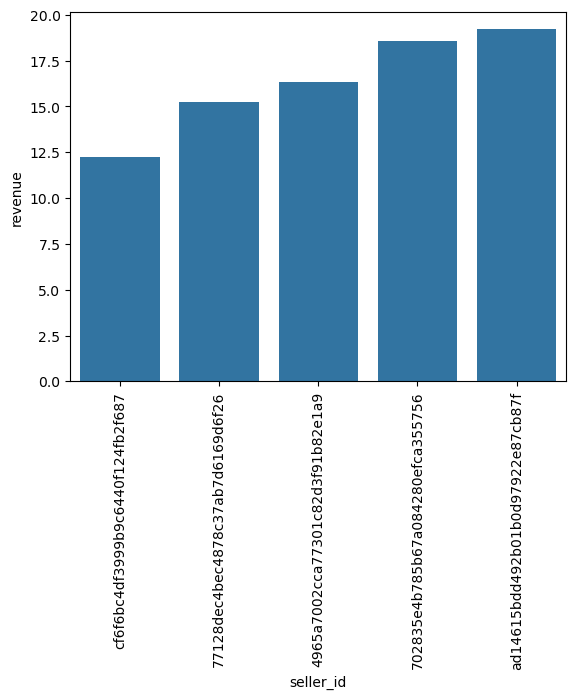

In [123]:
query = """select *, dense_rank() over(order by revenue) as rn 
from(select order_items.seller_id, sum(payments.payment_value) as revenue
from order_items
join  payments on payments.order_id = order_items.order_id
group by order_items.seller_id
order by revenue ) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["seller_id","revenue","rank"])
df = df.head()
sns.barplot(x="seller_id", y ="revenue",data = df)
plt.xticks(rotation =90)
plt.show()

#Calculate the moving average of order values for each customer over their order history

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np 

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Nnicky11@",
                            database = "ecommerce")

cur = db.cursor()
query = """select customer_id, order_purchase_timestamp, payment, avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
from 
(select orders.customer_id , orders.order_purchase_timestamp, payments.payment_value as payment
from payments 
join orders on payments.order_id = orders.order_id) as a """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["cus_id","order_purchaseTS","payments","mov_avg"])
df 

,cus_id,order_purchaseTS,payments,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


#Calculate the cumulative sales per month for each year.

In [168]:
query = """select years, months, payment, sum(payment)
over (order by years, months) as cumulative_sales 
from  
(select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) as months, round(sum(payments.payment_value),2) as payment 
from orders
join payments on orders.order_id = payments.order_id
group by years, months order by years, months) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","months","payment","cumulative_sales"])
df 

,year,months,payment,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


#Calculate the year-over-year growth rate of total sales.

In [176]:
query = """with a as(select year(orders.order_purchase_timestamp) as years, round(sum(payments.payment_value),2) as payment 
from orders
join payments on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment-lag(payment,1) over(order by years) )/lag(payment,1) over(order by years))*100 from a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","yoy%growth"])
df

,year,yoy%growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


#Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np 

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Nnicky11@",
                            database = "ecommerce")

cur = db.cursor()

In [9]:
query = """with a as (select customers.customer_id, min(orders.order_purchase_timestamp) first_order 
from customers 
join orders on customers.customer_id = orders.customer_id 
group by customers.customer_id),
b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a 
join orders on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/ count(distinct b.customer_id))
from a 
left join b on a.customer_id = b.customer_id"""

cur.execute(query)

data = cur.fetchall()

data

[(None,)]

In [ ]:
#there is zero customers who make another purchase within 6 months of their first purchase

#Identify the top 3 customers who spent the most money in each year

<function matplotlib.pyplot.show(close=None, block=None)>

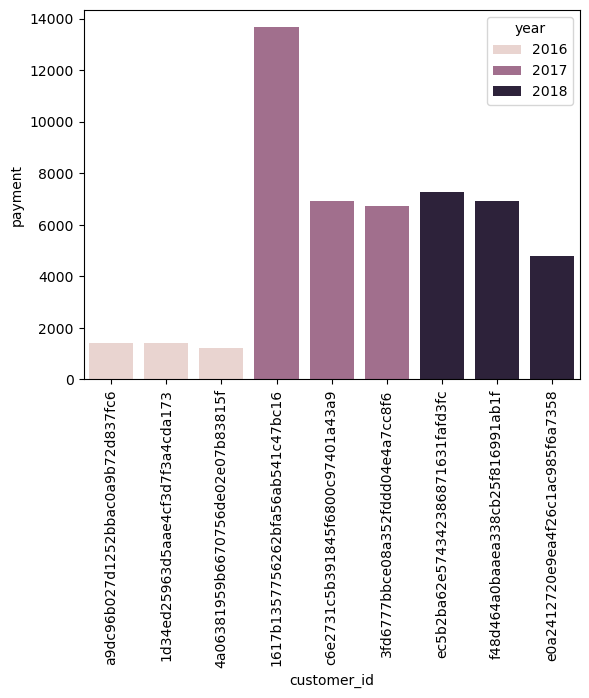

In [21]:
query = """select years, customer_id, d_rank, payment
from (select year(orders.order_purchase_timestamp) as years, orders.customer_id, sum(payments.payment_value) as payment, 
dense_rank() over (partition by year(orders.order_purchase_timestamp)order by sum(payments.payment_value)desc) d_rank
from orders
join payments on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp), 
orders.customer_id) as a
where d_rank <=3"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","customer_id","d_rank","payment"])
sns.barplot(x="customer_id", y="payment", data= df, hue ="year")
plt.xticks(rotation =90)
plt.show